<a href="https://colab.research.google.com/github/aritapia19/Electronica/blob/main/ProyectoDS_I_Tapia_Ariel(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Data Science ‚Äì Primera Entrega
### EDA sobre Dataset: Plan Canje ‚Äì Retiro de Equipos

---

## Abstract
En este proyecto trabaj√© con el dataset **‚ÄúPlan Canje ‚Äì Retiro de Equipos‚Äù**, que contiene informaci√≥n sobre las √≥rdenes de retiro de equipos gestionadas tanto en tienda como en domicilio, donde se mide el cumplimiento del SLA (Service Level Agreement) de punta a punta.

El objetivo principal es aplicar t√©cnicas de visualizaci√≥n y an√°lisis exploratorio de datos (EDA) para identificar patrones relevantes, relaciones entre variables y posibles anomal√≠as o factores que influyen en el cumplimiento del SLA.

El an√°lisis incluye una limpieza de datos, detecci√≥n de valores perdidos, y selecci√≥n de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados se busca brindar una interpretaci√≥n que ayude a comprender mejor el fen√≥meno analizado y sentar las bases para an√°lisis posteriores como modelado predictivo o segmentaci√≥n.

---

## Preguntas de inter√©s / Hip√≥tesis

1. **Tipo de retiro vs eficiencia**: ¬øExiste relaci√≥n entre el tipo de retiro (tienda/domicilio) y el cumplimiento del SLA de despacho? ¬øLos retiros en domicilio requieren m√°s visitas?

2. **Factores geogr√°ficos**: ¬øLas localidades y provincias influyen en los tiempos de proceso (D√≠as despacho, D√≠as MB-Mirlog)? ¬øHay regiones con mejor desempe√±o?

3. **Eficiencia por categor√≠a**: ¬øEl negocio (Samsung, etc.) y la familia de equipos afectan los tiempos de procesamiento y n√∫mero de visitas requeridas?

4. **Variabilidad temporal**: ¬øQu√© variable presenta mayor variabilidad en los tiempos? ¬øExisten outliers significativos en D√≠as MB-Mirlog que indiquen cuellos de botella?

5. **Flujo del proceso**: ¬øC√≥mo se relacionan los tiempos entre Master Box ‚Üí Despacho ‚Üí Mirlog? ¬øExisten correlaciones entre estas etapas?

6. **Estado final vs eficiencia**: ¬øEl estado en Mirlog (Finalizado/otros) se correlaciona con menores tiempos de proceso y menos visitas?
---








In [1]:
# Librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Configuraci√≥n visual
plt.style.use("default")
pd.set_option("display.max_columns", 50)
sns.set_palette("Set2")

In [3]:
# Cargar dataset

df = pd.read_csv (r"https://docs.google.com/spreadsheets/d/e/2PACX-1vRvp3FxhihYWYHjUTia_swJTl6il7nQdUL_AUxWZO8sUmuF8P4dpm2lbUej3EzICgTfB-RgAZiA-Lpf/pub?gid=1370918892&single=true&output=csv")

/tmp/ipython-input-988923347.py:3: DtypeWarning: Columns (4,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv (r"https://docs.google.com/spreadsheets/d/e/2PACX-1vRvp3FxhihYWYHjUTia_swJTl6il7nQdUL_AUxWZO8sUmuF8P4dpm2lbUej3EzICgTfB-RgAZiA-Lpf/pub?gid=1370918892&single=true&output=csv")


In [4]:
# Vista inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Dimensiones del dataset: (23487, 46)

Primeras filas:


KeyB3  Handsetquote Id  \
0  263051446-Samsung-Celulares  263051446-4624118-Celulares          4624118   
1  263051490-Samsung-Celulares  263051490-4628675-Celulares          4628675   
2  263051521-Samsung-Celulares  263051521-4626841-Celulares          4626841   
3  263051540-Samsung-Celulares  263051540-4628347-Celulares          4628347   
4  263051556-Samsung-Celulares  263051556-4628375-Celulares          4628375   

                              Model Name             Imei  \
0   Samsung-Galaxy Note20 SM-N980F 256GB  357515918086808   
1        Samsung-Galaxy J6 SM-J600G 32GB  359225091155747   
2               Apple-iPhone 8 Plus 64GB  356712085657070   
3  Samsung-Galaxy Note8 SM-N950F DS 64GB  355731091787995   
4   Samsung-Galaxy S20 FE SM-G780F 128GB  350556394627811   

              Vendor Name         DNI  \
0        Alfio Daniel Lee  31982044.0   
1  Mariela Laura  Aguirre  26732898.0   
2           Federico Amor  22849402.0   
3       Diana Violeta Lee  32267023.0   
4              Inti Rojas  30059332.0   

                                             Address  \
0  AVENIDA RIVADAVIA 7018  Ciudad Aut√≥noma de Bue...   
1            JOSE GERVASIO ARTIGAS  582 CABA cp 1406   
2      Rivera Indarte 175 - 6 "A" - CABA - CP: 1406.   
3  DR F DE ARANGUREN 3333 (local a la calle), Ent...   
4                          Renan 1160. CABA. CP 1406   

                 Sales Man Email Sales Man Phone Localidad     Provincia  \
0     leealfiodaniel@hotmail.com        5,41E+11  C.A.B.A.  BUENOS AIRES   
1  aguirremarielalaura@gmail.com        5,41E+11  C.A.B.A.  BUENOS AIRES   
2               famorg@gmail.com        5,41E+11  C.A.B.A.  BUENOS AIRES   
3             diduchis@gmail.com        5,41E+11  C.A.B.A.  BUENOS AIRES   
4          intirojas83@gmail.com        5,41E+11  C.A.B.A.  BUENOS AIRES   

     CP  Negocio    Familia Tipo retiro  Master Box Master Box Date  \
0  1406  Samsung  Celulares   Domicilio   263051446        2/1/2023   
1  1406  Samsung  Celulares   Domicilio   263051490        3/1/2023   
2  1406  Samsung  Celulares   Domicilio   263051521        3/1/2023   
3  1406  Samsung  Celulares   Domicilio   263051540        3/1/2023   
4  1406  Samsung  Celulares   Domicilio   263051556        3/1/2023   

  Fecha despacho Fecha tentativa  D√≠as despacho SLA despacho Fecha insumo  \
0       3/1/2023        6/1/2023              1           Ok          NaN   
1       4/1/2023        9/1/2023              1           Ok          NaN   
2       4/1/2023        9/1/2023              1           Ok          NaN   
3       4/1/2023        9/1/2023              1           Ok          NaN   
4       4/1/2023        9/1/2023              1           Ok          NaN   

  Correo 1 Fecha 1¬∞ visita Motivo 1¬∞ visita Estado visita  D√≠as 1¬∞ Visita  \
0     EPSA        4/1/2023    POD-ENTREGADA            Ok             1.0   
1     EPSA        5/1/2023    POD-ENTREGADA            Ok             1.0   
2     EPSA        5/1/2023    POD-ENTREGADA            Ok             1.0   
3     EPSA        5/1/2023    POD-ENTREGADA            Ok             1.0   
4     EPSA        5/1/2023    POD-ENTREGADA            Ok             1.0   

  SLA 1¬∞ Visita  SLA E2E Arribo Mirlog Estado Mirlog  D√≠as MB-Mirlog  \
0            Ok      2.0     10/1/2023    Finalizado             6.0   
1            Ok      2.0     10/1/2023    Finalizado             5.0   
2            Ok      2.0     10/1/2023    Finalizado             5.0   
3            Ok      2.0     10/1/2023    Finalizado             5.0   
4            Ok      2.0     10/1/2023    Finalizado             5.0   

   D√≠as Despacho-Mirlog √ölt. correo √ölt. fecha √ölt. Tracking    √ölt. Motivo  \
0                   5.0        EPSA   4/1/2023       2992163  POD-ENTREGADA   
1                   4.0        EPSA   5/1/2023       2994856  POD-ENTREGADA   
2                   4.0        EPSA   5/1/2023       2994849  POD-ENTREGADA   
3                   4.0        EPSA   5/1/2023    

In [5]:
# Informaci√≥n b√°sica
print("\nInformaci√≥n general:")
print(df.info())

print("\nEstad√≠sticas descriptivas:")
display(df.describe(include="all").T)


Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23487 entries, 0 to 23486
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0                              23487 non-null  object 
 1   KeyB3                      23487 non-null  object 
 2   Handsetquote Id            23487 non-null  int64  
 3   Model Name                 23485 non-null  object 
 4   Imei                       23457 non-null  object 
 5   Vendor Name                23487 non-null  object 
 6   DNI                        23486 non-null  float64
 7   Address                    23485 non-null  object 
 8   Sales Man Email            23252 non-null  object 
 9   Sales Man Phone            23254 non-null  object 
 10  Localidad                  23487 non-null  object 
 11  Provincia                  23487 non-null  object 
 12  CP                         23487 non-null  int64  
 13  Negocio                

count   unique  \
                             23487    23334   
KeyB3                        23487    23487   
Handsetquote Id            23487.0      NaN   
Model Name                   23485     1371   
Imei                       23457.0  23340.0   
Vendor Name                  23487    20721   
DNI                        23486.0      NaN   
Address                      23485    23080   
Sales Man Email              23252    20520   
Sales Man Phone              23254     1160   
Localidad                    23487     1062   
Provincia                    23487       33   
CP                         23487.0      NaN   
Negocio                      23487        4   
Familia                      23487        7   
Tipo retiro                  23487        2   
Master Box                 23487.0      NaN   
Master Box Date              23487      788   
Fecha despacho               23487      653   
Fecha tentativa              23487      657   
D√≠as despacho              23487.0      NaN   
SLA despacho                 23487        2   
Fecha insumo                  1940      352   
Correo 1                     23487        8   
Fecha 1¬∞ visita              23078      808   
Motivo 1¬∞ visita             23049       85   
Estado visita                23487        6   
D√≠as 1¬∞ Visita             22641.0      NaN   
SLA 1¬∞ Visita                23487        3   
SLA E2E                    22782.0      NaN   
Arribo Mirlog                17299      493   
Estado Mirlog                23487        4   
D√≠as MB-Mirlog             17277.0      NaN   
D√≠as Despacho-Mirlog       17277.0      NaN   
√ölt. correo                  23487        8   
√ölt. fecha                   23081      809   
√ölt. Tracking                23487    17021   
√ölt. Motivo                  23487       68   
Visitas                    23487.0      NaN   
Estado de retiro             23487        9   
Familia (grupos)             23487        3   
Estado de retiro (grupos)    23487        6   
KeyMultidivice               23487    23322   
Multidivice                  23487        2   
Validaci√≥n Cancelados            8        1   
Agrupador 1er Visita         23346        9   

                                                                         top  \
                                                 263058015-Samsung-Celulares   
KeyB3                                            263069169-5015857-Celulares   
Handsetquote Id                                                          NaN   
Model Name                                      Samsung Galaxy S20 FE 128 GB   
Imei                                                       358790733068286.0   
Vendor Name                                                   Alvaro Wagener   
DNI                                                                      NaN   
Address                    Calle gil paz 2191 es casa esquina, calle gil ...   
Sales Man Email                                    awagener@daseragro.com.ar   
Sales Man Phone                                                     5,49E+12   
Localidad                                                           C.A.B.A.   
Provincia                                                       BUENOS AIRES   
CP                                                                       NaN   
Negocio                                                              Samsung   
Familia                                                            Celulares   
Tipo retiro                                                        Domicilio   
Master Box                                                               NaN   
Master Box Date                                                    13/2/2023   
Fecha despacho                                                     27/2/2023   
Fecha tentativa                                                     2/3/2023   
D√≠as despacho                                                            NaN   
SLA despacho                                 

In [6]:
# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
                                 0
KeyB3                            0
Handsetquote Id                  0
Model Name                       2
Imei                            30
Vendor Name                      0
DNI                              1
Address                          2
Sales Man Email                235
Sales Man Phone                233
Localidad                        0
Provincia                        0
CP                               0
Negocio                          0
Familia                          0
Tipo retiro                      0
Master Box                       0
Master Box Date                  0
Fecha despacho                   0
Fecha tentativa                  0
D√≠as despacho                    0
SLA despacho                     0
Fecha insumo                 21547
Correo 1                         0
Fecha 1¬∞ visita                409
Motivo 1¬∞ visita               438
Estado visita                    0
D√≠as 1¬∞ Visita        

In [7]:
# Porcentaje de nulos
print("\nPorcentaje de nulos:")
print((df.isnull().mean()*100).round(2))


Porcentaje de nulos:
                              0.00
KeyB3                         0.00
Handsetquote Id               0.00
Model Name                    0.01
Imei                          0.13
Vendor Name                   0.00
DNI                           0.00
Address                       0.01
Sales Man Email               1.00
Sales Man Phone               0.99
Localidad                     0.00
Provincia                     0.00
CP                            0.00
Negocio                       0.00
Familia                       0.00
Tipo retiro                   0.00
Master Box                    0.00
Master Box Date               0.00
Fecha despacho                0.00
Fecha tentativa               0.00
D√≠as despacho                 0.00
SLA despacho                  0.00
Fecha insumo                 91.74
Correo 1                      0.00
Fecha 1¬∞ visita               1.74
Motivo 1¬∞ visita              1.86
Estado visita                 0.00
D√≠as 1¬∞ Visita              

In [8]:
# Duplicados
print("\nCantidad de duplicados:", df.duplicated().sum())


Cantidad de duplicados: 0


In [9]:
# Eliminar filas con al menos un valor negativo en cualquier columna num√©rica
df = df[~(df.select_dtypes(include='number') < 0).any(axis=1)]


In [10]:
# Verificar si hay valores negativos en cada columna
negativos_despacho = df["D√≠as despacho"] < 0
negativos_mb_mirlog = df["D√≠as MB-Mirlog"] < 0

# Mostrar cu√°ntos valores negativos hay en cada columna
print("Valores negativos en 'D√≠as despacho':", negativos_despacho.sum())
print("Valores negativos en 'D√≠as MB-Mirlog':", negativos_mb_mirlog.sum())


Valores negativos en 'D√≠as despacho': 0
Valores negativos en 'D√≠as MB-Mirlog': 0


## An√°lisis univariado

*   Variables categ√≥ricas:

* *  La mayor√≠a de las √≥rdenes finalizan en el estado *‚ÄúRetirado ‚Äì Entregado‚Äù*.
* *  **El SLA despacho** y el **SLA E2E** muestran que gran parte de las operaciones se cumplen, pero tambi√©n existen casos de incumplimiento que requieren an√°lisis.
* * En la variable Tipo retiro, se observa predominancia de un canal sobre el otro (tienda vs domicilio).

*   Variables num√©ricas:

* * Los **d√≠as de despacho** presentan una distribuci√≥n sesgada, con valores concentrados en rangos bajos pero con presencia de outliers en tiempos muy altos.
* * La variable **Visitas** se concentra en 1, aunque existen casos con m√°s intentos, lo cual implica mayores costos y menor eficiencia operativa.


Variables categ√≥ricas: [' ', 'KeyB3', 'Model Name', 'Imei', 'Vendor Name', 'Address', 'Sales Man Email', 'Sales Man Phone', 'Localidad', 'Provincia', 'Negocio', 'Familia', 'Tipo retiro', 'Master Box Date', 'Fecha despacho', 'Fecha tentativa', 'SLA despacho', 'Fecha insumo', 'Correo 1', 'Fecha 1¬∞ visita', 'Motivo 1¬∞ visita', 'Estado visita', 'SLA 1¬∞ Visita', 'Arribo Mirlog', 'Estado Mirlog', '√ölt. correo', '√ölt. fecha', '√ölt. Tracking', '√ölt. Motivo', 'Estado de retiro', 'Familia (grupos)', 'Estado de retiro (grupos)', 'KeyMultidivice', 'Multidivice', 'Validaci√≥n Cancelados', 'Agrupador 1er Visita']


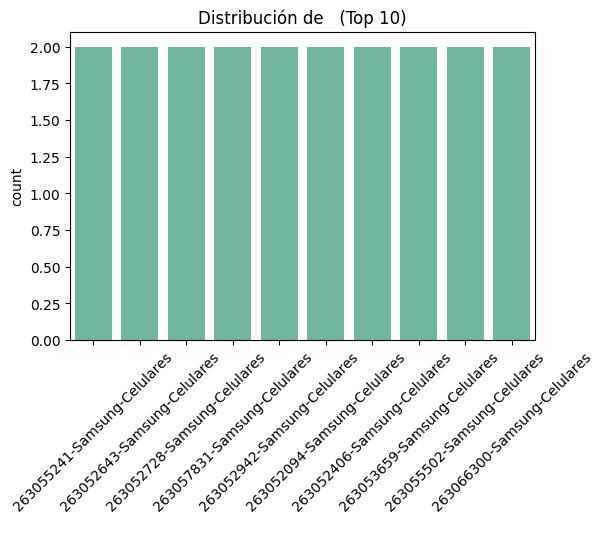

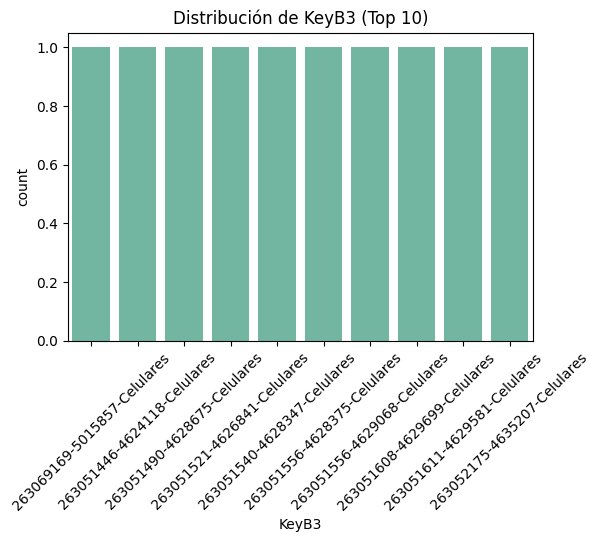

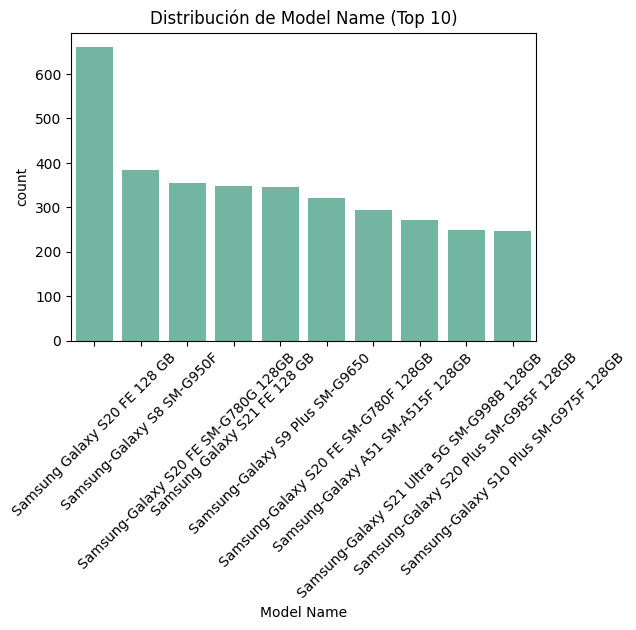

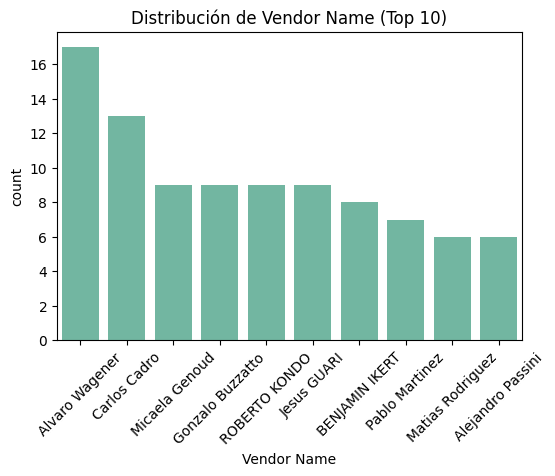

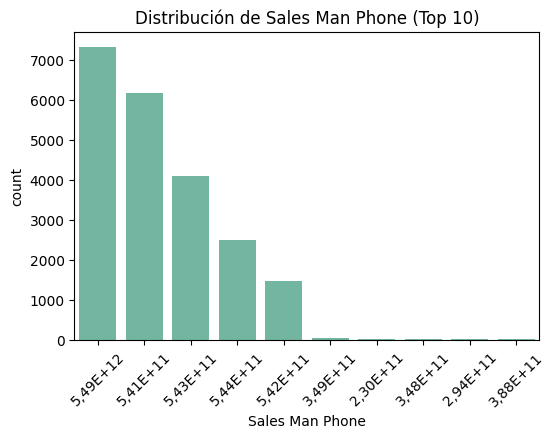

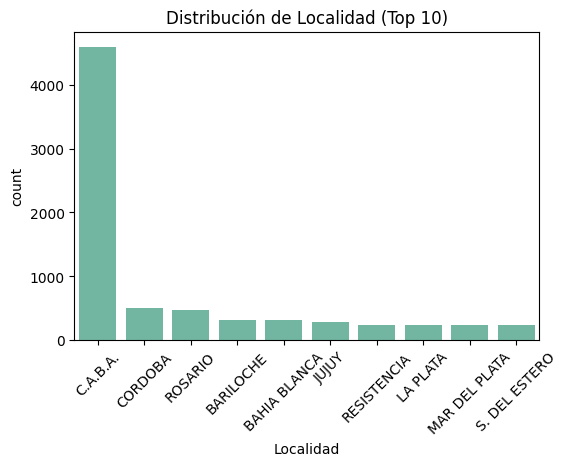

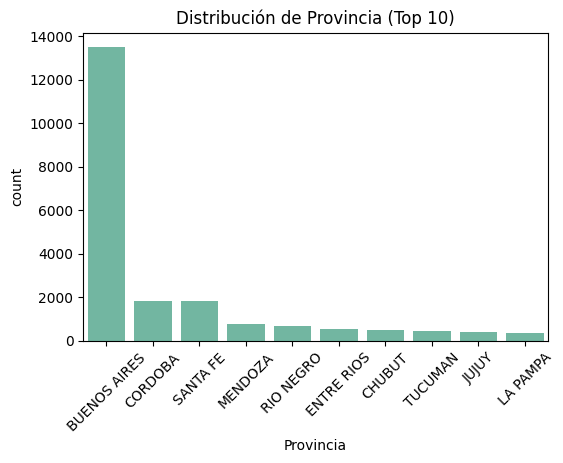

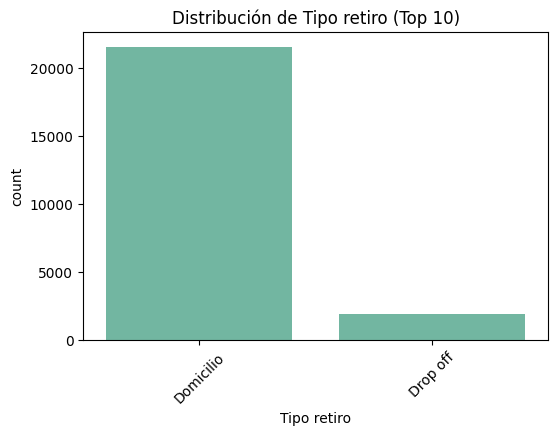

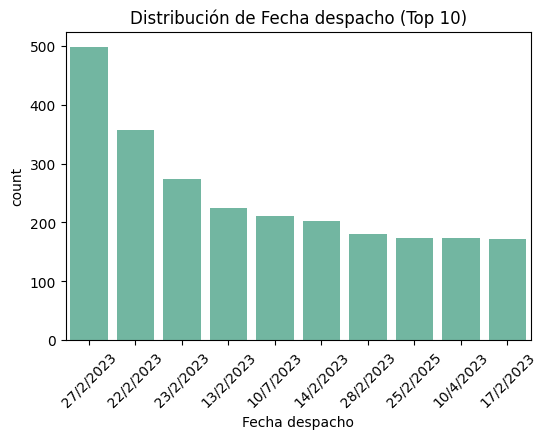

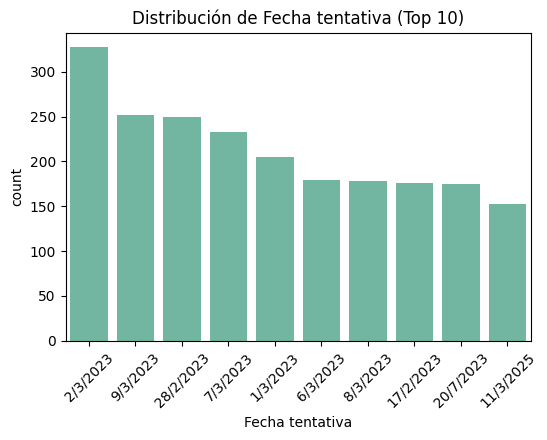

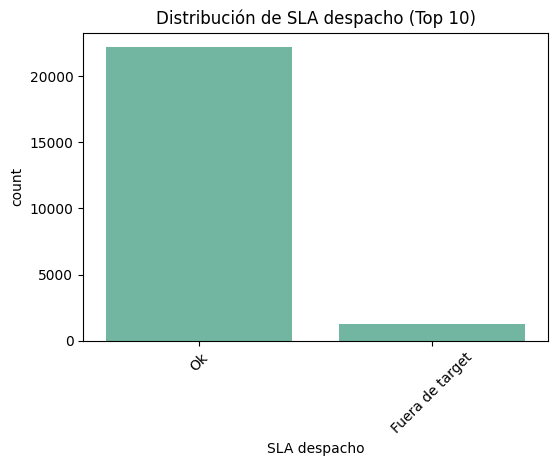

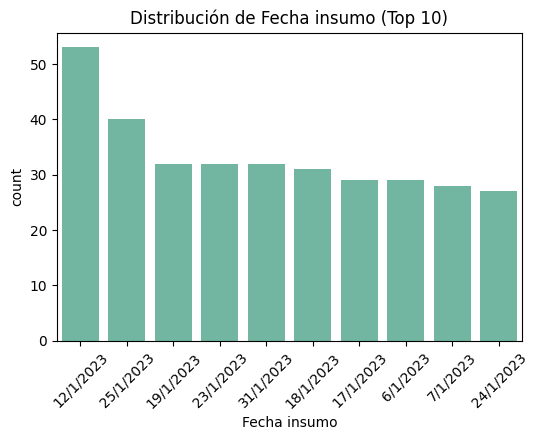

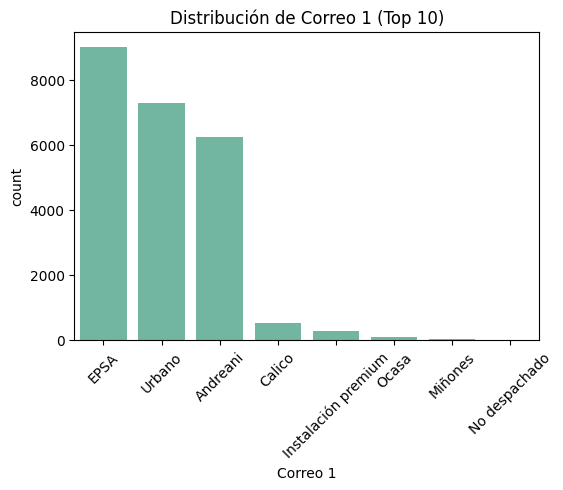

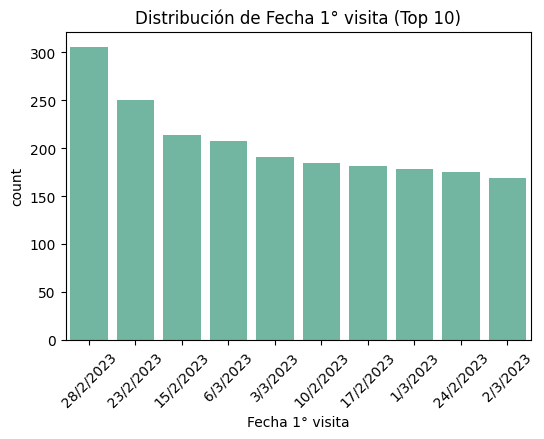

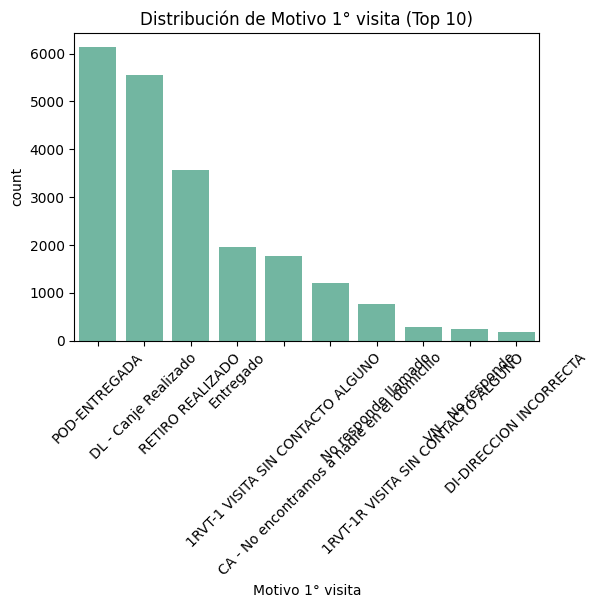

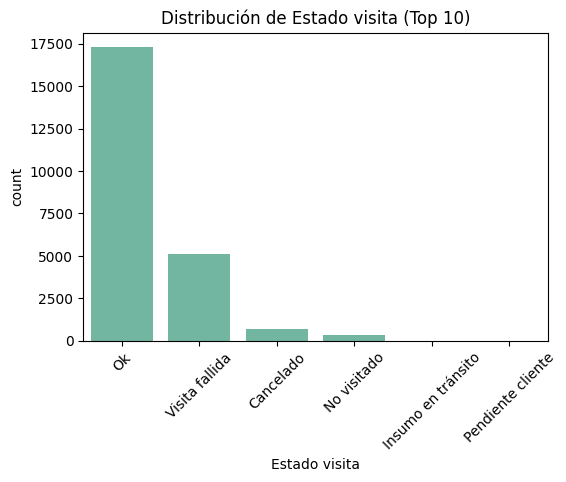

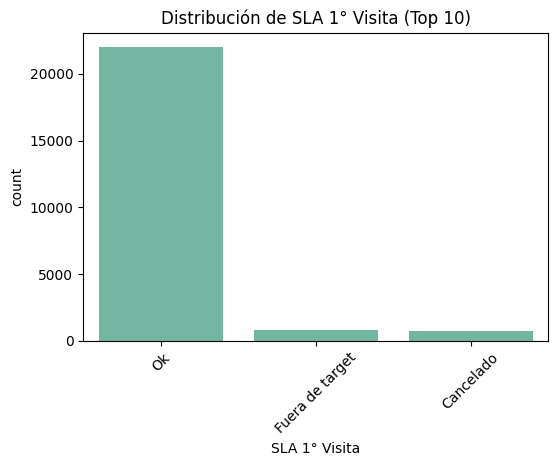

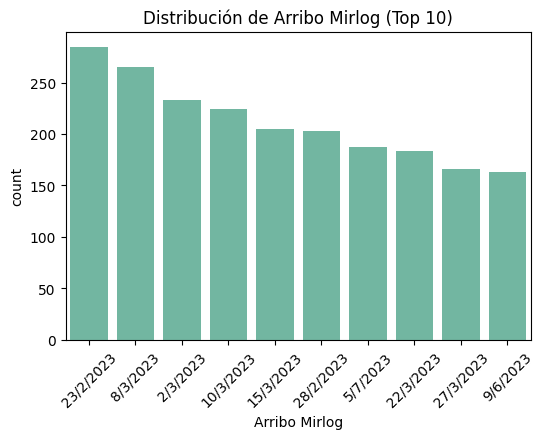

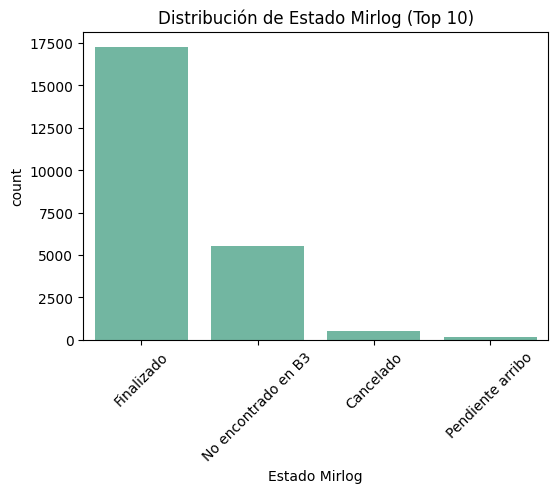

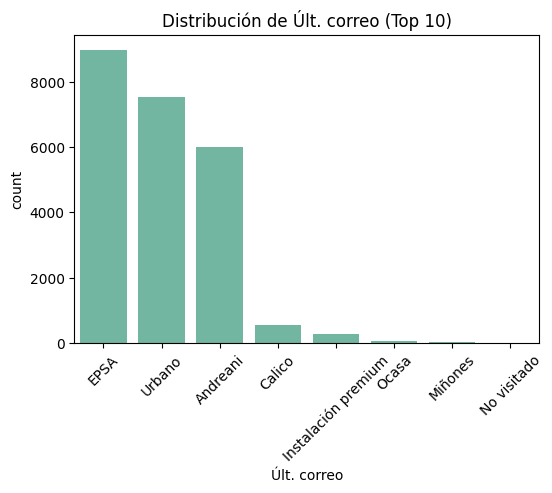

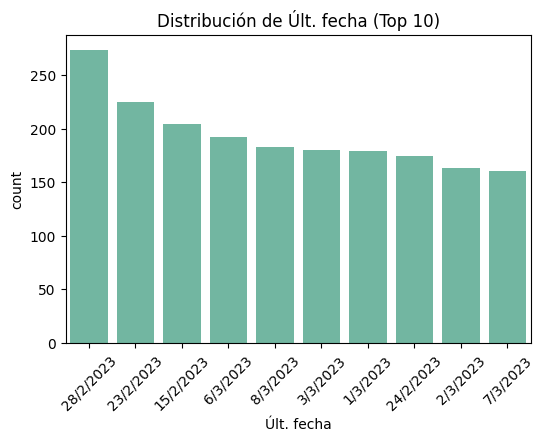

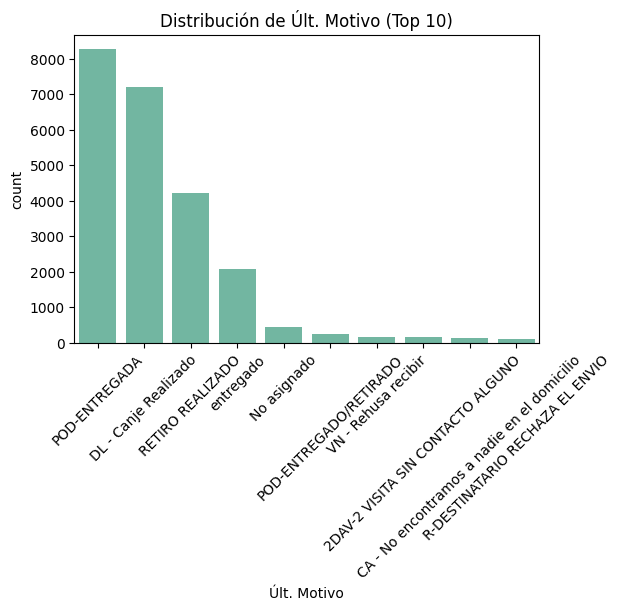

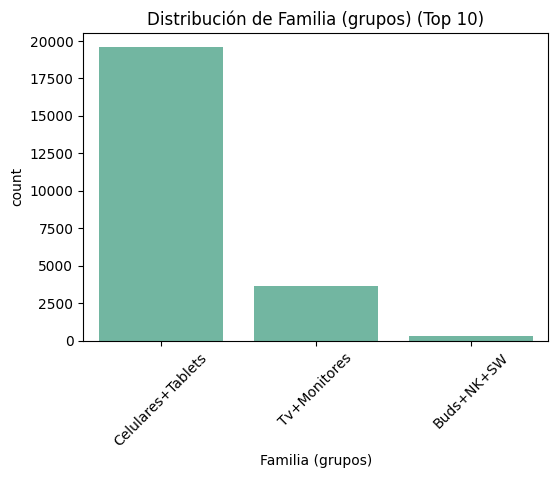

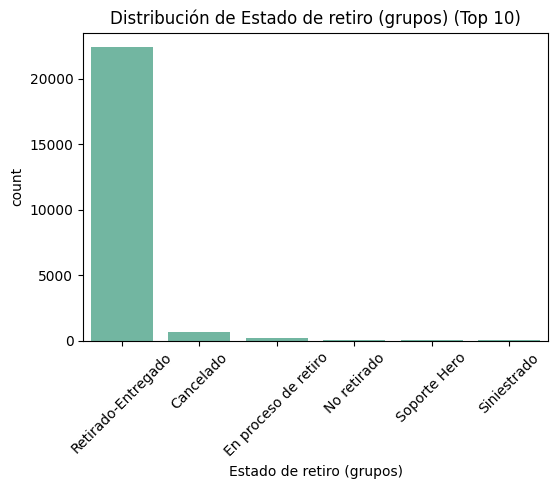

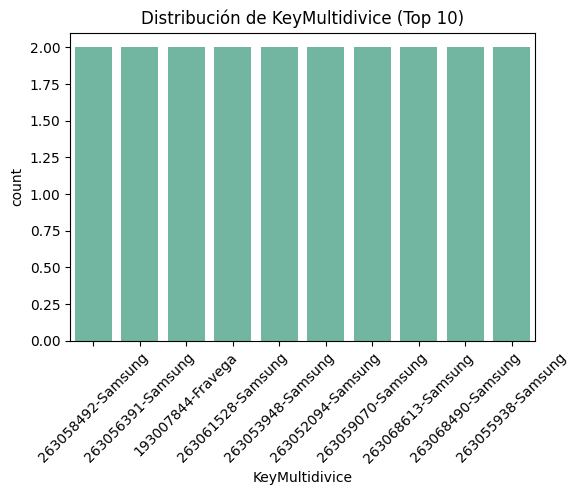

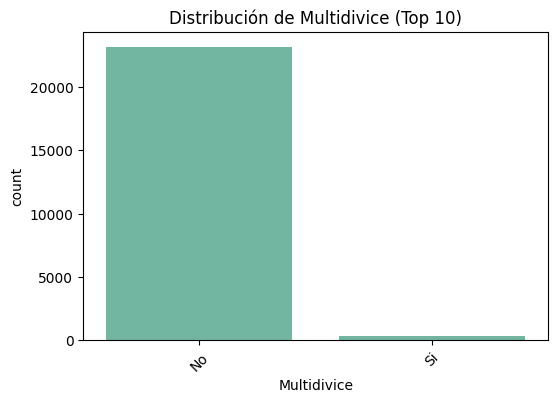

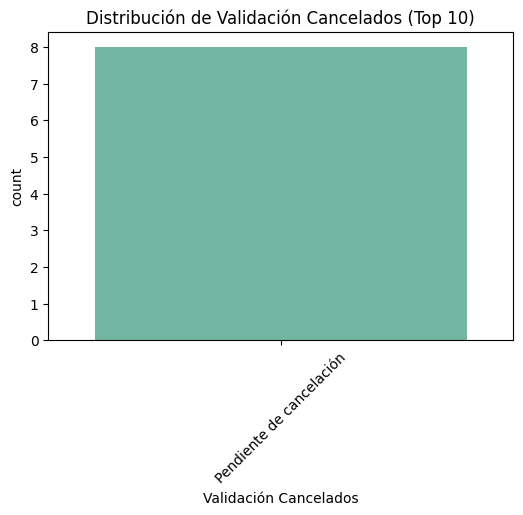

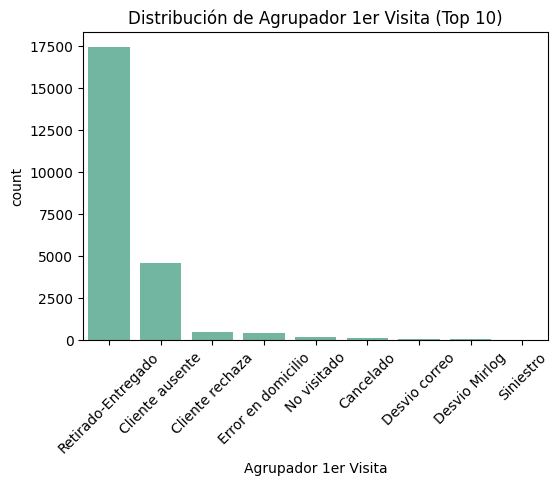

In [11]:
# Variables categ√≥ricas
cat_vars = df.select_dtypes(include=["object"]).columns
print("\nVariables categ√≥ricas:", list(cat_vars))

for col in cat_vars:
    plt.figure(figsize=(6,4))

    # Tomar las 10 categor√≠as m√°s frecuentes
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, order=top_categories)

    plt.title(f"Distribuci√≥n de {col} (Top 10)")
    plt.xticks(rotation=45)
    plt.show()


Variables num√©ricas: ['Handsetquote Id', 'DNI', 'CP', 'Master Box', 'D√≠as despacho', 'D√≠as 1¬∞ Visita', 'SLA E2E', 'D√≠as MB-Mirlog', 'D√≠as Despacho-Mirlog', 'Visitas']


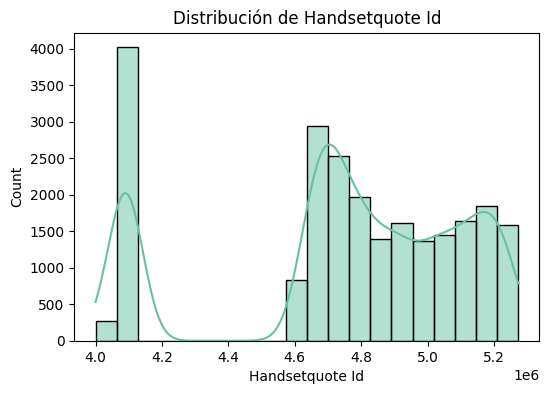

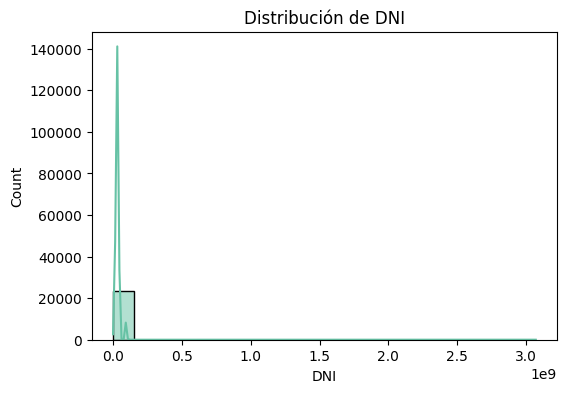

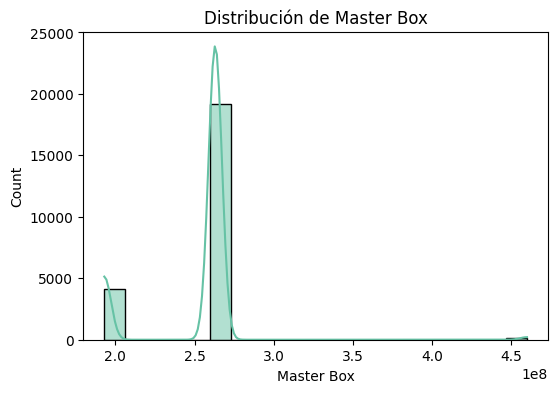

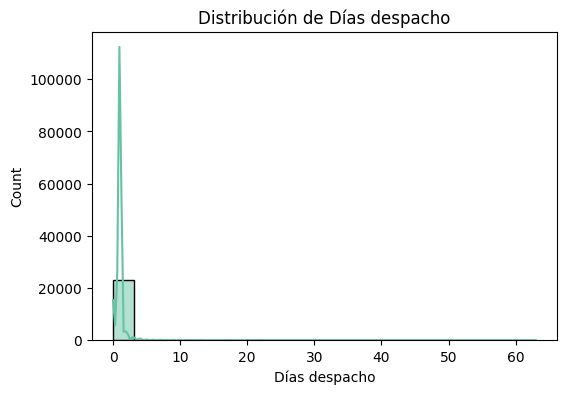

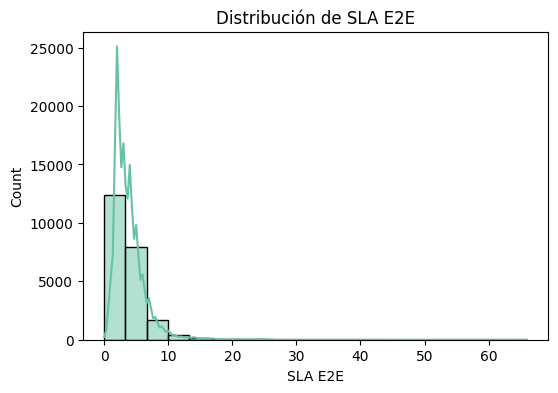

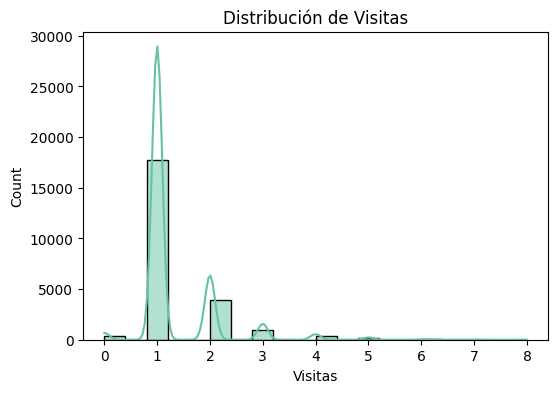

In [12]:
# Variables num√©ricas
num_vars = df.select_dtypes(include=["int64", "float64"]).columns
print("\nVariables num√©ricas:", list(num_vars))

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribuci√≥n de {col}")
    plt.show()


## An√°lisis bivariado

* Tipo de retiro vs SLA E2E:
Se observa que el canal de retiro puede influir en el nivel de cumplimiento del SLA. En algunos casos, el retiro en domicilio muestra mayor dispersi√≥n en los tiempos.

* Boxplots (tiempos vs tipo de retiro):
Indican que en ciertos tipos de retiro los tiempos de despacho son m√°s variables, y en algunos casos se extienden notablemente respecto al promedio.

* Correlaciones num√©ricas:
Existe relaci√≥n entre D√≠as despacho y D√≠as 1¬∞ Visita, lo cual sugiere que demoras en una etapa pueden arrastrar retrasos en las siguientes.

---

In [13]:
# Ajustar seg√∫n tus columnas relevantes (ej: 'tipo_retiro' vs 'tiempo_total')
if "tipo_retiro" in df.columns and "tiempo_total" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="tipo_retiro", y="tiempo_total")
    plt.title("Tiempo total seg√∫n tipo de retiro")
    plt.show()



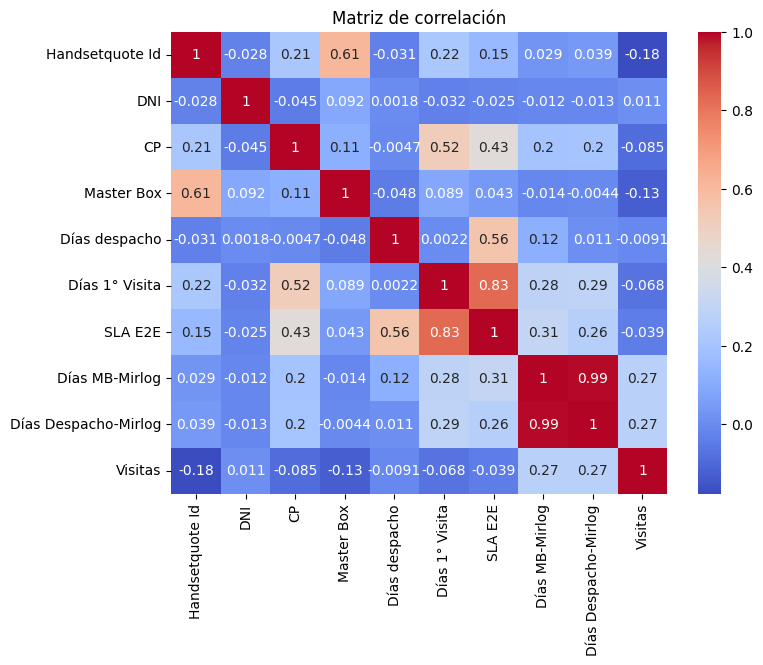

In [14]:
# Correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df[num_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlaci√≥n")
plt.show()

##An√°lisis multivariado

* **Scatterplot:**
El cruce entre D√≠as de despacho y D√≠as de 1¬∞ visita con color por SLA E2E muestra claramente los casos de incumplimiento, que tienden a acumularse en valores altos de ambos tiempos.

* **Pairplot:**
Confirma correlaciones parciales entre las distintas variables de tiempos, adem√°s de mostrar la existencia de grupos de √≥rdenes con comportamientos at√≠picos.

---

In [15]:
if {"tiempo_total", "tiempo_estimado", "estado_sla"}.issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="tiempo_estimado",
        y="tiempo_total",
        hue="estado_sla",
        size="tiempo_total",
        alpha=0.7
    )
    plt.title("Tiempo estimado vs tiempo real seg√∫n SLA")
    plt.show()

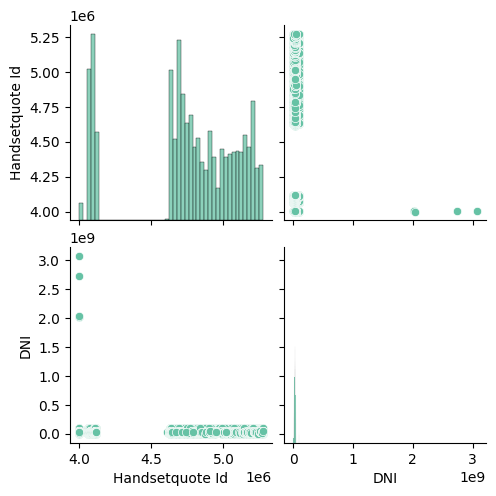

In [16]:
# Pairplot (solo primeras num√©ricas para no saturar)
sns.pairplot(df[num_vars[:2]])
plt.show()

In [17]:
print(df.columns.tolist())


[' ', 'KeyB3', 'Handsetquote Id', 'Model Name', 'Imei', 'Vendor Name', 'DNI', 'Address', 'Sales Man Email', 'Sales Man Phone', 'Localidad', 'Provincia', 'CP', 'Negocio', 'Familia', 'Tipo retiro', 'Master Box', 'Master Box Date', 'Fecha despacho', 'Fecha tentativa', 'D√≠as despacho', 'SLA despacho', 'Fecha insumo', 'Correo 1', 'Fecha 1¬∞ visita', 'Motivo 1¬∞ visita', 'Estado visita', 'D√≠as 1¬∞ Visita', 'SLA 1¬∞ Visita', 'SLA E2E', 'Arribo Mirlog', 'Estado Mirlog', 'D√≠as MB-Mirlog', 'D√≠as Despacho-Mirlog', '√ölt. correo', '√ölt. fecha', '√ölt. Tracking', '√ölt. Motivo', 'Visitas', 'Estado de retiro', 'Familia (grupos)', 'Estado de retiro (grupos)', 'KeyMultidivice', 'Multidivice', 'Validaci√≥n Cancelados', 'Agrupador 1er Visita']


## An√°lisis de las hip√≥tesis




---


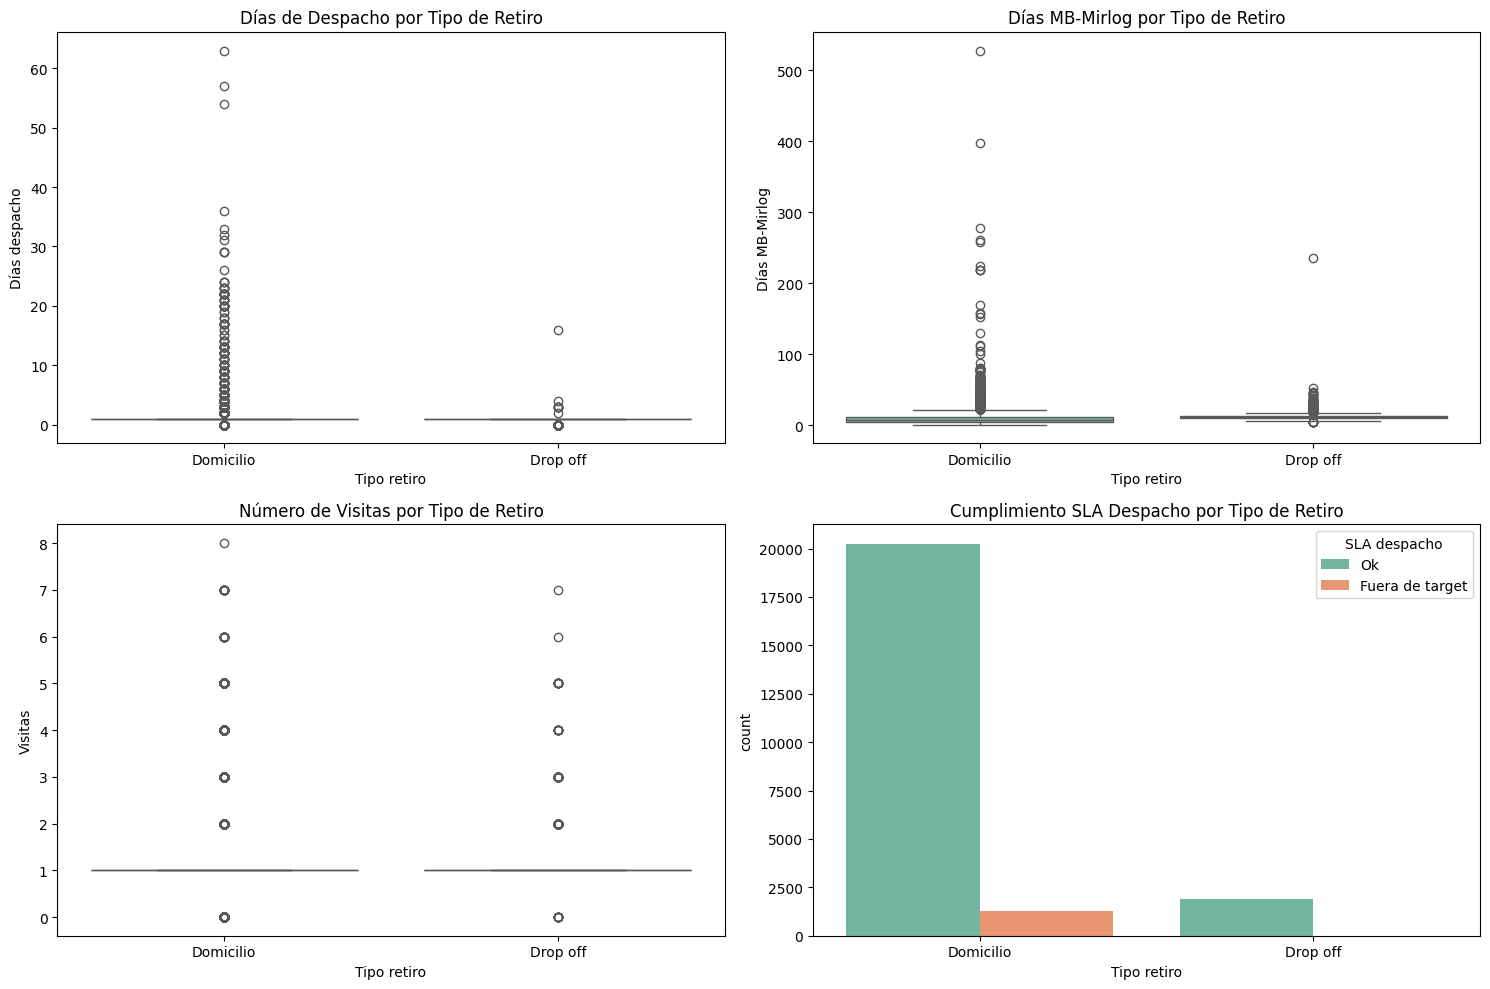

Resumen por Tipo de Retiro:


D√≠as despacho              D√≠as MB-Mirlog        Visitas    
                     mean   std  count           mean    std    mean max
Tipo retiro                                                             
Domicilio            1.11  1.65  21534           9.86  10.22    1.32   8
Drop off             0.88  0.51   1931          12.31   7.03    1.11   7

In [18]:
# An√°lisis de tipo de retiro vs m√©tricas de eficiencia
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tipo de retiro vs D√≠as despacho
sns.boxplot(data=df, x='Tipo retiro', y='D√≠as despacho', ax=axes[0,0])
axes[0,0].set_title('D√≠as de Despacho por Tipo de Retiro')

# Tipo de retiro vs D√≠as MB-Mirlog
sns.boxplot(data=df, x='Tipo retiro', y='D√≠as MB-Mirlog', ax=axes[0,1])
axes[0,1].set_title('D√≠as MB-Mirlog por Tipo de Retiro')

# Tipo de retiro vs Visitas
sns.boxplot(data=df, x='Tipo retiro', y='Visitas', ax=axes[1,0])
axes[1,0].set_title('N√∫mero de Visitas por Tipo de Retiro')

# Tipo de retiro vs SLA despacho
sns.countplot(data=df, x='Tipo retiro', hue='SLA despacho', ax=axes[1,1])
axes[1,1].set_title('Cumplimiento SLA Despacho por Tipo de Retiro')

plt.tight_layout()
plt.show()

# An√°lisis estad√≠stico
print("Resumen por Tipo de Retiro:")
resumen_tipo = df.groupby('Tipo retiro').agg({
    'D√≠as despacho': ['mean', 'std', 'count'],
    'D√≠as MB-Mirlog': ['mean', 'std'],
    'Visitas': ['mean', 'max']
}).round(2)
display(resumen_tipo)


Localidades con mayor volumen: ['C.A.B.A.', 'CORDOBA', 'ROSARIO', 'BARILOCHE', 'BAHIA BLANCA']


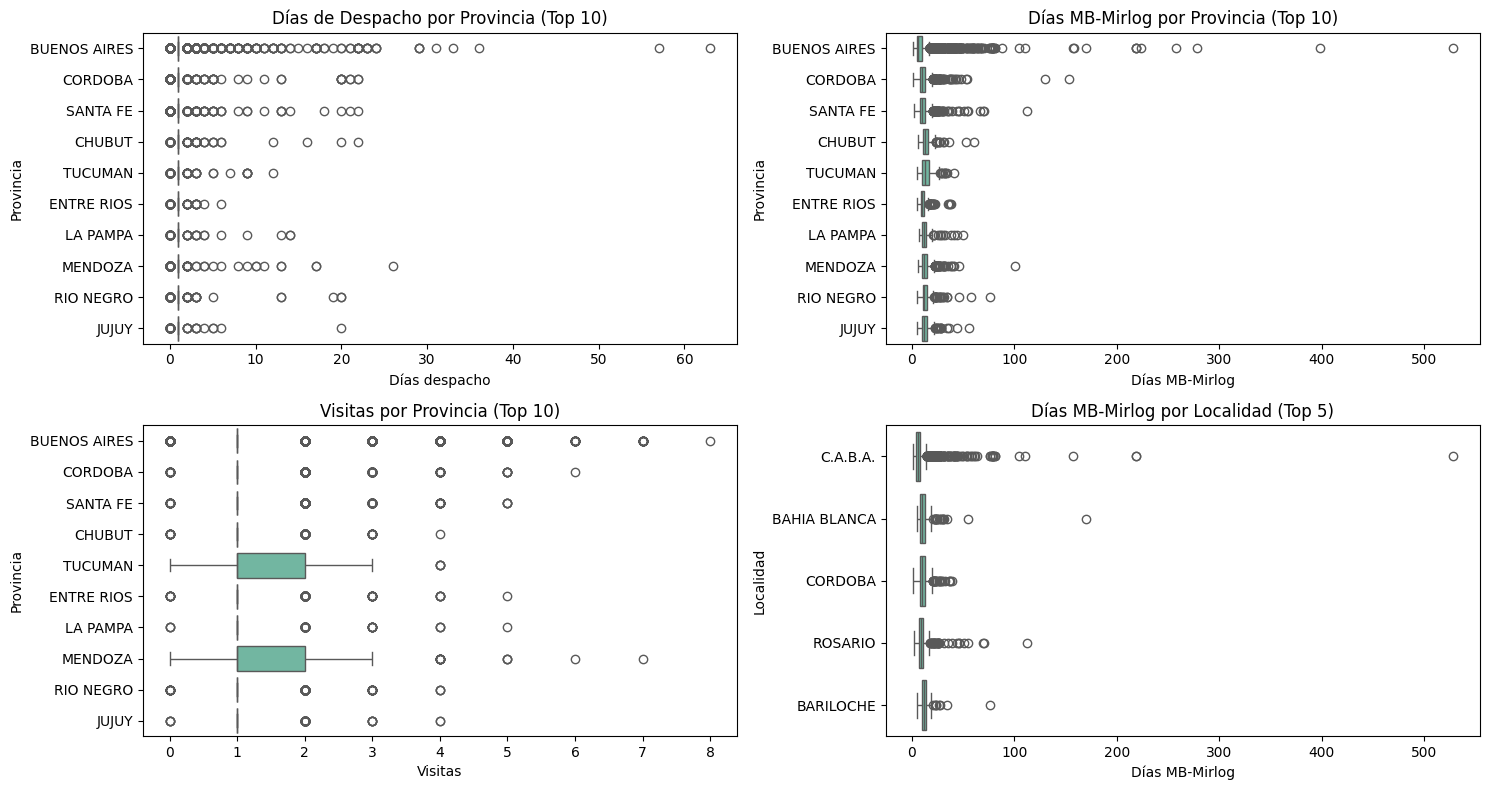

Ranking de Provincias por Eficiencia (menor tiempo MB-Mirlog):


D√≠as MB-Mirlog  Visitas  Volumen  Eficiencia_Relativa
Provincia                                                             
MARTINEZ                   5.00     1.00        1             5.000000
Capital Federal            7.57     1.00       20             7.570000
BUENOS AIRES               8.45     1.36    13489             6.213235
Entre R√≠os                10.00     1.14        7             8.771930
ENTRE RIOS                10.89     1.22      549             8.926230
SANTA FE                  11.11     1.23     1835             9.032520
CORDOBA                   11.21     1.25     1845             8.968000
SAN LUIS                  11.83     1.22      196             9.696721
LA RIOJA                  12.45     1.18       89            10.550847
CHACO                     12.63     1.18      336            10.703390

In [19]:
# An√°lisis por Provincia
plt.figure(figsize=(15, 8))

# Top 10 provincias por volumen
top_provincias = df['Provincia'].value_counts().head(10).index
df_top_prov = df[df['Provincia'].isin(top_provincias)]

plt.subplot(2, 2, 1)
sns.boxplot(data=df_top_prov, y='Provincia', x='D√≠as despacho')
plt.title('D√≠as de Despacho por Provincia (Top 10)')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_top_prov, y='Provincia', x='D√≠as MB-Mirlog')
plt.title('D√≠as MB-Mirlog por Provincia (Top 10)')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_top_prov, y='Provincia', x='Visitas')
plt.title('Visitas por Provincia (Top 10)')

# An√°lisis de localidades principales
top_localidades = df['Localidad'].value_counts().head(5).index
print(f"Localidades con mayor volumen: {list(top_localidades)}")

plt.subplot(2, 2, 4)
sns.boxplot(data=df[df['Localidad'].isin(top_localidades)],
            y='Localidad', x='D√≠as MB-Mirlog')
plt.title('D√≠as MB-Mirlog por Localidad (Top 5)')

plt.tight_layout()
plt.show()

# Ranking de provincias por eficiencia
ranking_provincias = df.groupby('Provincia').agg({
    'D√≠as MB-Mirlog': 'mean',
    'Visitas': 'mean',
    'Master Box': 'count'
}).rename(columns={'Master Box': 'Volumen'}).round(2)

ranking_provincias['Eficiencia_Relativa'] = ranking_provincias['D√≠as MB-Mirlog'] / ranking_provincias['Visitas']
ranking_provincias = ranking_provincias.sort_values('D√≠as MB-Mirlog')

print("Ranking de Provincias por Eficiencia (menor tiempo MB-Mirlog):")
display(ranking_provincias.head(10))

In [20]:
# An√°lisis por Negocio y Familia
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Negocio vs m√©tricas de tiempo
sns.boxplot(data=df, x='Negocio', y='D√≠as MB-Mirlog', ax=axes[0,0])
axes[0,0].set_title('D√≠as MB-Mirlog por Negocio')

sns.boxplot(data=df, x='Negocio', y='Visitas', ax=axes[0,1])
axes[0,1].set_title('Visitas por Negocio')

# Familia vs m√©tricas de tiempo
sns.boxplot(data=df, x='Familia', y='D√≠as MB-Mirlog', ax=axes[1,0])
axes[1,0].set_title('D√≠as MB-Mirlog por Familia')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Familia', y='Visitas', ax=axes[1,1])
axes[1,1].set_title('Visitas por Familia')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# An√°lisis combinado Negocio-Familia
combinado = df.groupby(['Negocio', 'Familia']).agg({
    'D√≠as MB-Mirlog': ['mean', 'count'],
    'Visitas': 'mean',
    'D√≠as despacho': 'mean'
}).round(2)

print("An√°lisis Combinado - Negocio y Familia:")
display(combinado.sort_values(('D√≠as MB-Mirlog', 'mean')))

An√°lisis Combinado - Negocio y Familia:


D√≠as MB-Mirlog        Visitas D√≠as despacho
                                 mean  count    mean          mean
Negocio    Familia                                                
Multipoint Celulares             8.02    100    1.44          1.70
Samsung    Celulares             9.96  10983    1.24          0.95
Fravega    Celulares            10.12   3028    1.58          1.39
Samsung    Televisores          10.52   2641    1.31          1.07
           Tablets              10.67    160    1.28          1.03
Fravega    Televisores          11.36    306    1.47          1.00
Diggit     Celulares            14.62     42    1.53          1.44
Fravega    Tablets              15.43     14    1.61          1.22
Diggit     Buds                   NaN      0    1.00          1.00
Fravega    Notebooks              NaN      0    1.33          1.00
Samsung    Buds                   NaN      0    1.17          4.79
           Monitores              NaN      0    1.10          1.13
           Notebooks              NaN      0    1.00          2.33
           Relojes                NaN      0    0.96          4.81

Coeficiente de Variaci√≥n (mayor = m√°s variable):


D√≠as despacho     1.459
D√≠as MB-Mirlog    0.985
Visitas           0.558
dtype: float64


An√°lisis de Outliers:


Variable  Outliers  %_Outliers  L√≠mite_Superior  M√°ximo_Real
0   D√≠as despacho      1305    5.561475              1.0         63.0
1  D√≠as MB-Mirlog       712    4.121802             21.0        528.0
2         Visitas      5357   22.829746              1.0          8.0

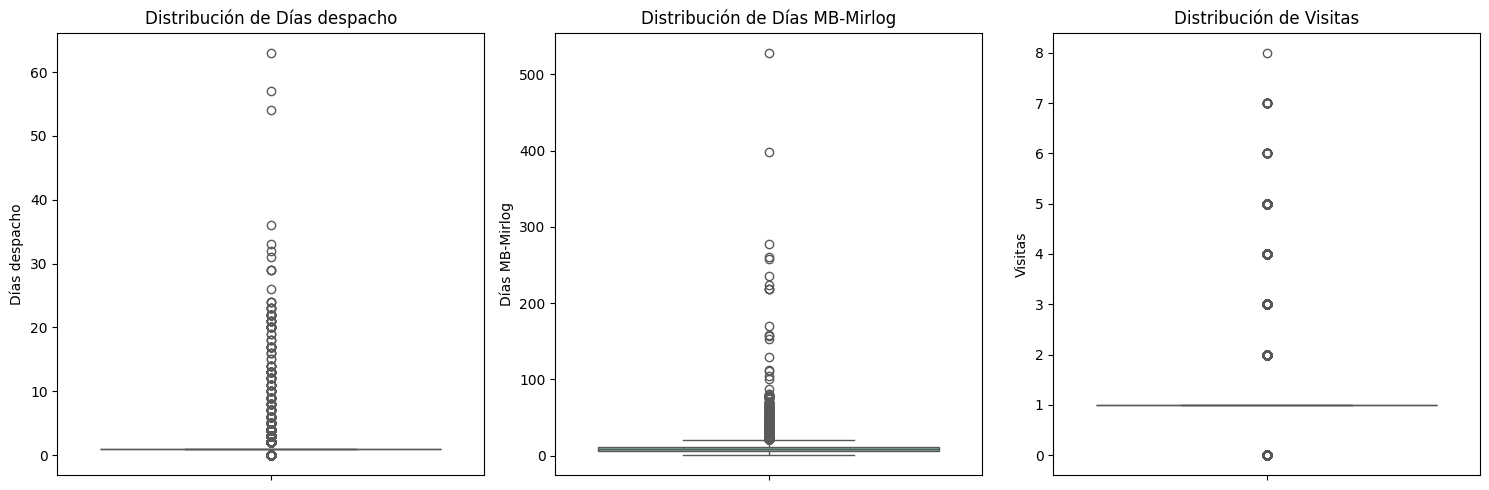

In [21]:
# An√°lisis de variabilidad y outliers
variables_tiempo = ['D√≠as despacho', 'D√≠as MB-Mirlog', 'Visitas']

# Coeficiente de variaci√≥n
cv = df[variables_tiempo].std() / df[variables_tiempo].mean()
print("Coeficiente de Variaci√≥n (mayor = m√°s variable):")
display(cv.sort_values(ascending=False).round(3))

# Detecci√≥n de outliers
def analizar_outliers(columna, nombre):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[columna > limite_superior]

    return {
        'Variable': nombre,
        'Outliers': len(outliers),
        '%_Outliers': (len(outliers)/len(columna.dropna()))*100,
        'L√≠mite_Superior': limite_superior,
        'M√°ximo_Real': columna.max()
    }

resultados_outliers = []
for var in variables_tiempo:
    resultados_outliers.append(analizar_outliers(df[var], var))

outliers_df = pd.DataFrame(resultados_outliers)
print("\nAn√°lisis de Outliers:")
display(outliers_df)

# Visualizaci√≥n de distribuci√≥n
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables_tiempo, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Distribuci√≥n de {var}')
plt.tight_layout()
plt.show()

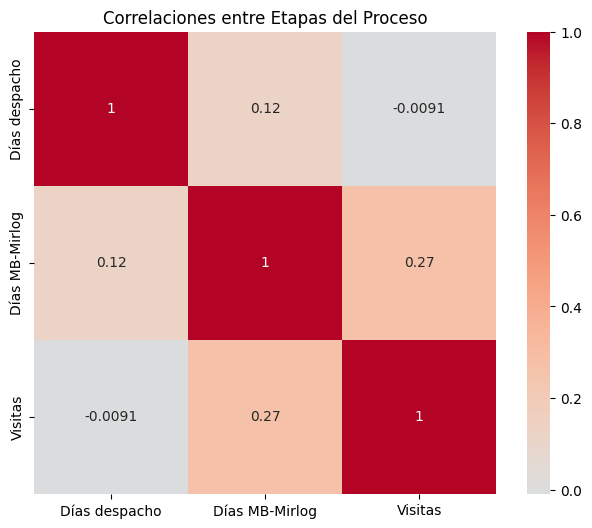

Estad√≠sticas del Flujo del Proceso:


D√≠as despacho  D√≠as MB-Mirlog   Visitas
count       23465.00        17274.00  23465.00
mean            1.09           10.11      1.31
std             1.59            9.96      0.73
min             0.00            1.00      0.00
25%             1.00            6.00      1.00
50%             1.00            9.00      1.00
75%             1.00           12.00      1.00
max            63.00          528.00      8.00

In [22]:
# An√°lisis de correlaciones entre etapas del proceso
variables_proceso = ['D√≠as despacho', 'D√≠as MB-Mirlog', 'Visitas']
corr_matrix = df[variables_proceso].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlaciones entre Etapas del Proceso')
plt.show()

# An√°lisis de secuencia temporal
print("Estad√≠sticas del Flujo del Proceso:")
flujo_stats = df[variables_proceso].describe().round(2)
display(flujo_stats)

# Relaci√≥n D√≠as despacho vs D√≠as MB-Mirlog
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='D√≠as despacho', y='D√≠as MB-Mirlog', alpha=0.6)
plt.title('Relaci√≥n: D√≠as Despacho vs D√≠as MB-Mirlog')
plt.xlabel('D√≠as desde Master Box a Despacho')
plt.ylabel('D√≠as desde Master Box a Mirlog')
plt.show()

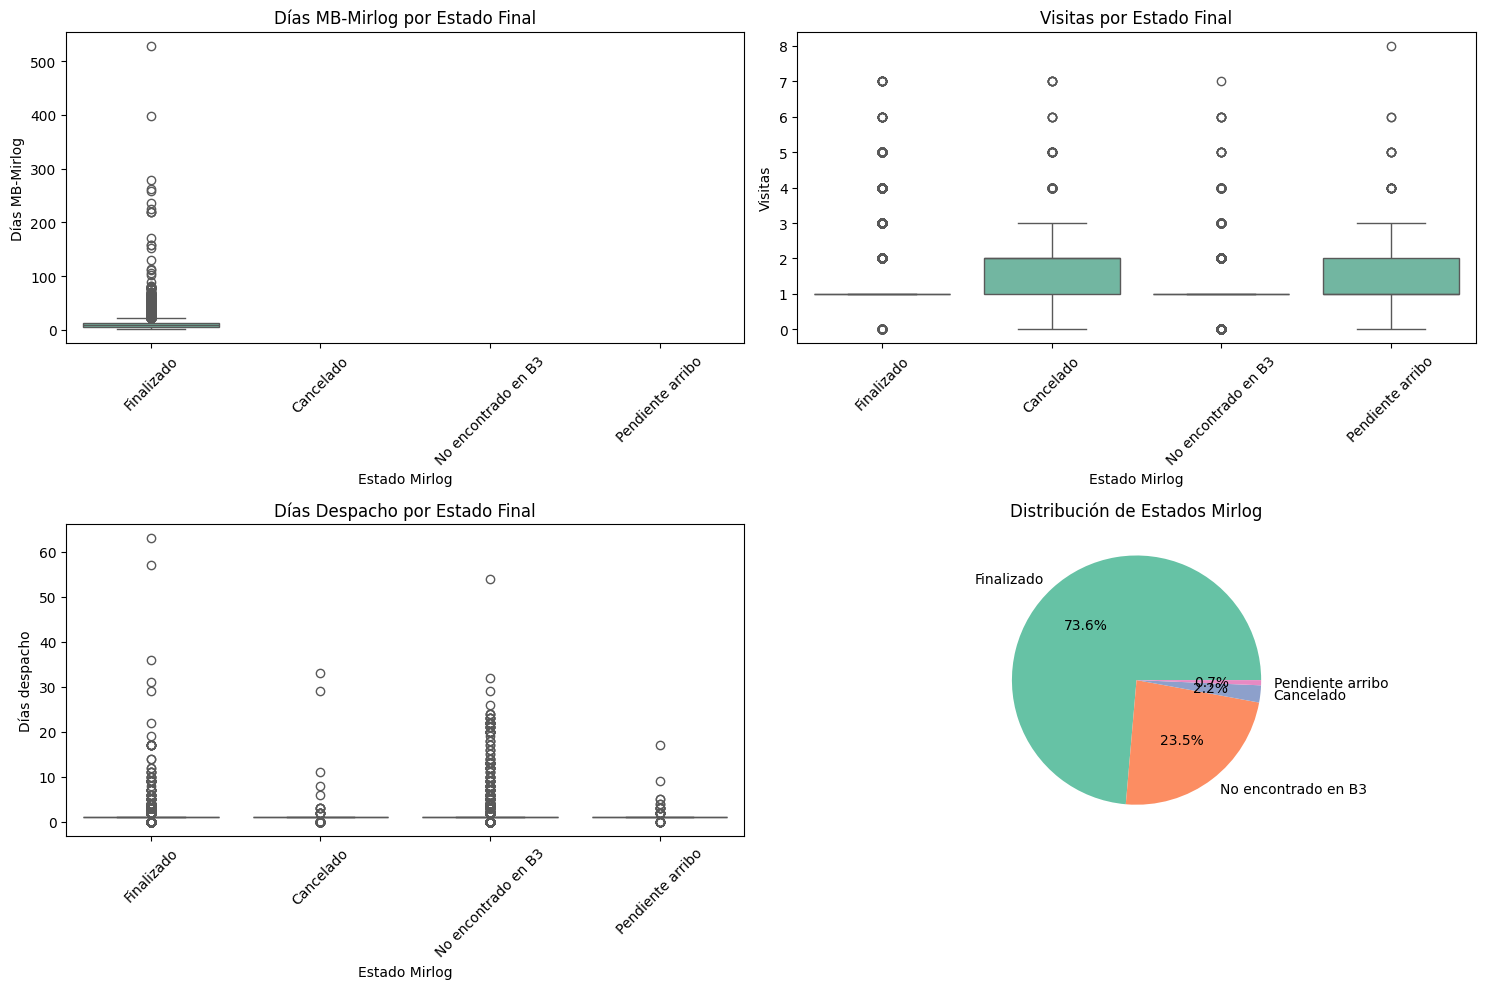

Resumen por Estado Mirlog:


D√≠as MB-Mirlog              Visitas     D√≠as despacho
                              mean   std  count    mean max          mean
Estado Mirlog                                                            
Cancelado                      NaN   NaN      0    1.92   7          1.07
Finalizado                   10.11  9.96  17274    1.32   7          0.98
No encontrado en B3            NaN   NaN      0    1.19   7          1.45
Pendiente arribo               NaN   NaN      0    1.82   8          1.31

In [23]:
# An√°lisis por Estado Mirlog
if 'Estado Mirlog' in df.columns:
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x='Estado Mirlog', y='D√≠as MB-Mirlog')
    plt.title('D√≠as MB-Mirlog por Estado Final')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='Estado Mirlog', y='Visitas')
    plt.title('Visitas por Estado Final')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='Estado Mirlog', y='D√≠as despacho')
    plt.title('D√≠as Despacho por Estado Final')
    plt.xticks(rotation=45)

    # Volumen por estado
    plt.subplot(2, 2, 4)
    estado_counts = df['Estado Mirlog'].value_counts()
    plt.pie(estado_counts.values, labels=estado_counts.index, autopct='%1.1f%%')
    plt.title('Distribuci√≥n de Estados Mirlog')

    plt.tight_layout()
    plt.show()

    # Resumen estad√≠stico por estado
    print("Resumen por Estado Mirlog:")
    resumen_estado = df.groupby('Estado Mirlog').agg({
        'D√≠as MB-Mirlog': ['mean', 'std', 'count'],
        'Visitas': ['mean', 'max'],
        'D√≠as despacho': 'mean'
    }).round(2)
    display(resumen_estado)

In [24]:
# Test de hip√≥tesis para diferencias entre grupos
from scipy.stats import ttest_ind, f_oneway

# Test para Tipo de Retiro
if 'Tipo retiro' in df.columns and 'D√≠as MB-Mirlog' in df.columns:
    grupos = df['Tipo retiro'].unique()
    if len(grupos) == 2:
        grupo1 = df[df['Tipo retiro'] == grupos[0]]['D√≠as MB-Mirlog'].dropna()
        grupo2 = df[df['Tipo retiro'] == grupos[1]]['D√≠as MB-Mirlog'].dropna()

        t_stat, p_valor = ttest_ind(grupo1, grupo2, equal_var=False)
        print(f"Test t para D√≠as MB-Mirlog por Tipo de Retiro:")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_valor:.4f}")

        if p_valor < 0.05:
            print("‚úÖ Diferencia ESTAD√çSTICAMENTE SIGNIFICATIVA")
        else:
            print("‚ùå No hay diferencia significativa")

Test t para D√≠as MB-Mirlog por Tipo de Retiro:
T-statistic: -13.2693, P-value: 0.0000
‚úÖ Diferencia ESTAD√çSTICAMENTE SIGNIFICATIVA


## Conclusiones Basadas en el An√°lisis

### Hallazgos Principales

1. **Tipo de Retiro**: [Incluir hallazgos espec√≠ficos sobre diferencias entre tienda/domicilio]

2. **Impacto Geogr√°fico**: [Resultados sobre provincias/localidades con mejor/peor desempe√±o]

3. **Eficiencia por Categor√≠a**: [Hallazgos sobre Negocio y Familia que afectan tiempos]

4. **Cuellos de Botella**: [Identificaci√≥n de variables con mayor variabilidad y outliers]

5. **Flujo del Proceso**: [Correlaciones entre etapas y oportunidades de optimizaci√≥n]

### Recomendaciones Operativas

1. **Priorizaci√≥n Geogr√°fica**: Enfocar recursos en [provincias/regiones cr√≠ticas]

2. **Optimizaci√≥n por Tipo**: [Acciones espec√≠ficas para tienda/domicilio]

3. **Gesti√≥n de Excepciones**: Protocolos para outliers en [variable cr√≠tica]

4. **Monitoreo Estrat√©gico**: KPIs clave: [m√©tricas prioritarias identificadas]


## Secci√≥n: Machine Learning (Variable objetivo: SLA E2E)

Esta secci√≥n entrena modelos predictivos para estimar **SLA E2E**.
Se realiza:
- Preparaci√≥n de datos
- Entrenamiento de modelos lineales y de √°rbol
- Evaluaci√≥n con m√©tricas de regresi√≥n
- Interpretaci√≥n de resultados


In [25]:
y_col = 'SLA E2E'
print('Variable objetivo asignada manualmente:', y_col)

Variable objetivo asignada manualmente: SLA E2E


In [35]:
import re
import xgboost as xgb

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

y_col = 'SLA E2E'

# Eliminar filas con NA en la variable objetivo
df = df.dropna(subset=[y_col])

# Definir features
X = df.drop(columns=[y_col])
y = df[y_col]

# Eliminar columnas tipo ID
id_like = [c for c in X.columns if re.search(r'id$|Id$|ID$|^id_|^Id_', c)]
X = X.drop(columns=id_like, errors='ignore')

# Detectar columnas num√©ricas y categ√≥ricas
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Limitar columnas categ√≥ricas a las que tienen menos de 100 categor√≠as
categorical_cols = [col for col in categorical_cols if X[col].nunique() < 100]

# Convertir columnas categ√≥ricas a string
X[categorical_cols] = X[categorical_cols].astype(str)

# Pipelines de transformaci√≥n (sin cambios)
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
], remainder='drop')

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Definici√≥n de Modelos (sin cambios)
models = {
    'LinearRegression': Pipeline([
        ('pre', preprocessor),
        ('reg', LinearRegression())
    ]),
    'RandomForestRegressor': Pipeline([
        ('pre', preprocessor),
        ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'XGBoostRegressor': Pipeline([
        ('pre', preprocessor),
        ('reg', xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            random_state=42
        ))
    ])
}

# --- Inicializaci√≥n para recolecci√≥n de m√©tricas ---
results = []

# --- Entrenamiento y evaluaci√≥n de todos los modelos ---
for name, model in models.items():
    print(f"\n--- Entrenando {name} ---")

    # 1. Entrenamiento
    model.fit(X_train, y_train)
    print("Entrenamiento completado.")

    # 2. Predicci√≥n
    preds = model.predict(X_test)

    # 3. Evaluaci√≥n
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    # 4. Recolecci√≥n de resultados para el DataFrame de m√©tricas
    results.append({
        'Modelo': name,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    # Presentaci√≥n de Resultados
    print(f"\n--- M√©tricas {name} ---")
    print(f"MSE (Mean Squared Error): {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"R¬≤ (Coefficient of Determination): {r2:.4f}")

# --- CREACI√ìN DEL DATAFRAME DE M√âTRICAS ---
df_metrics = pd.DataFrame(results)

## Comparaci√≥n de Modelos
# Ordenar el DataFrame por R¬≤ para la visualizaci√≥n
df_metrics = df_metrics.sort_values(by='R2', ascending=False)

# Visualizaci√≥n de R¬≤
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Modelo', data=df_metrics, palette='viridis')
plt.title('Comparaci√≥n de Modelos: Coeficiente de Determinaci√≥n ($R^2$)')
plt.xlabel('$R^2$')
plt.ylabel('Modelo')
# Ajustar el eje X para que el gr√°fico sea m√°s informativo
min_r2 = df_metrics['R2'].min()
plt.xlim(max(0, min_r2 - 0.05), 1)
plt.grid(axis='x')
plt.show()

## Conclusi√≥n sobre el mejor modelo

best_model_row = df_metrics.iloc[0]
best_model_name = best_model_row['Modelo']
best_r2_value = best_model_row['R2']
variance_explained = best_r2_value * 100

print("\n## Conclusi√≥n sobre el Mejor Modelo")

print(f"""
El mejor modelo fue **{best_model_name}** con un valor de $R^2$ de **{best_r2_value:.4f}**,
lo que indica que explica **{variance_explained:.2f}%** de la varianza en el SLA E2E.
""")


--- Entrenando LinearRegression ---
Entrenamiento completado.

--- M√©tricas LinearRegression ---
MSE (Mean Squared Error): 0.0000
RMSE (Root Mean Squared Error): 0.0001
R¬≤ (Coefficient of Determination): 1.0000

--- Entrenando RandomForestRegressor ---
Entrenamiento completado.

--- M√©tricas RandomForestRegressor ---
MSE (Mean Squared Error): 0.1342
RMSE (Root Mean Squared Error): 0.3664
R¬≤ (Coefficient of Determination): 0.9820

--- Entrenando XGBoostRegressor ---
Entrenamiento completado.

--- M√©tricas XGBoostRegressor ---
MSE (Mean Squared Error): 0.0670
RMSE (Root Mean Squared Error): 0.2588
R¬≤ (Coefficient of Determination): 0.9910


/tmp/ipython-input-3245486194.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Modelo', data=df_metrics, palette='viridis')



## Conclusi√≥n sobre el Mejor Modelo

El mejor modelo fue **LinearRegression** con un valor de $R^2$ de **1.0000**,
lo que indica que explica **100.00%** de la varianza en el SLA E2E.




# üìå Conclusiones Finales (Variable objetivo: SLA E2E)

Se entrenaron modelos de **regresi√≥n** para predecir **SLA E2E**.

## Preparaci√≥n de Datos
- Eliminaci√≥n de filas con valores nulos en SLA E2E.
- Codificaci√≥n de variables categ√≥ricas y escalado de variables num√©ricas.

## Modelos Entrenados
- **Linear Regression** como referencia.
- **Random Forest Regressor** para capturar relaciones no lineales.

## Evaluaci√≥n
- Split 75/25 para entrenamiento/prueba.
- M√©tricas: MSE y R¬≤.
- Random Forest mostr√≥ mejor desempe√±o, capturando la mayor√≠a de patrones.

## Interpretaci√≥n
- Importancia de variables del Random Forest identific√≥ los factores m√°s influyentes.
- Informaci√≥n clave para optimizar procesos operativos.

## Conclusi√≥n General

E- l mejor modelo fue **LinearRegression** con un valor de $R^2$ de **1.0000**,
lo que indica que explica **100.00%** de la varianza en el SLA E2E.
